In [2]:
coin_sentiment = []
analyzer = SentimentIntensityAnalyzer()

def article_sentiment(news):

    for post in news['data']['children']:
    
        try:
            sentiment = analyzer.polarity_scores(post['data']['selftext'])
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
    
            coin_sentiment.append({
                'date':str(datetime.fromtimestamp(post['data']['created'])),
                'subreddit':post['data']['subreddit'],
                'title':post['data']['title'],
                'selftext':post['data']['selftext'],
                'upvote_ratio':post['data']['upvote_ratio'], 
                'ups':post['data']['ups'],
                'downs':post['data']['downs'],
                'score':post['data']['score'],
                'compound': compound,
                'positive': pos,
                'negative': neg,
                'neutral': neu})
#            ignore_index=True)
        except AttributeError:
            pass
    sentiment_df = pd.DataFrame(coin_sentiment)
    return sentiment_df

In [3]:
reddit_requests = {}

for i in range(len(nlp_cryptos)):
    response = requests.get(f'https://oauth.reddit.com/r/{nlp_cryptos[i]}/controversial.json?limit=10&t=day', headers=headers)
    if response.status_code ==200:
        reddit_requests[i] = response
    else:
        pass


sentiment_df = pd.DataFrame()
for i in reddit_requests:
    try:
        articles = (reddit_requests[i].json())
        sentiment_df = sentiment_df.append(article_sentiment(articles))
    except:
        pass
sentiment_df['subreddit'] = sentiment_df['subreddit'].str.lower()


isolation = dict()
for k, v in sentiment_df.groupby('subreddit'):
    isolation[k] = v



summary = dict()
for x in nlp_cryptos:
    try:
        summary[x] = (isolation[x].describe())
        summary[x].to_csv(f'Data/Functionality/Reddit/Reddit_{x}.csv')
    except:
        pass

skipping request with status code 403
skipping request with status code 404
passed
No data for bitcoin
No data for avalanche
No data for polygon
No data for wrapped
No data for bitcoin
No data for hnt


In [4]:
influencers = ['wallstreetbets','elonmusk','VitalikButerin','rogerkver','aantop','brian_armstrong','ethereumJoseph','tyler','cameron']

#extract 100 tweets from twitter user
recent_twitter_df = pd.DataFrame()

for influencer in influencers:
    recent_posts = api.user_timeline(screen_name = influencer, count=10, tweet_mode='extended')
    data = pd.DataFrame( [tweet.full_text for tweet in recent_posts] , columns=['Tweets'])
    recent_twitter_df = recent_twitter_df.append(data)

recent_twitter_df.to_csv('Data/Functionality/Twitter/raw_twitter_data.csv')


#clean the text
#create a function that cleans up the tweets
def clean_text(text):
    text= re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
    text = re.sub(r'#','', text) #removes the # symbol
    text = re.sub(r'RT[\s]+','', text) #removes RT
    text = re.sub(r'https?:\/\/\S+','', text) #removes hyperlink
    return text

recent_twitter_df['Tweets'] = recent_twitter_df['Tweets'].apply(clean_text)
recent_twitter_df.to_csv('Data/Functionality/Twitter/twitter_clean_text_function.csv')


                                              Tweets
0                : A Tesla to someone in a crosswalk
1    That's like saying your car has a V8 engine ...
0                                            Exactly
1       Yes, that is the other major source of di...
0  An introduction to some of the cryptographic t...
1                                 Crypto cities!\n\n
0  Today marks the 10 year anniversary of my firs...
1  Securities laws are outdated. \nNeeding a lice...
0   Kapan pengumuman pemenang hadiah bulanan Prog...
1        I made $399 today check out how I made it! 
0  : Are you in Ireland, Italy, Germany or Spain?...
1  : _ Inflation is the most regressive tax of al...
0  : 🔈The struggle's been real. \n\nWe've partner...
1  The paradigm shift to a world running on decen...
0    Congrats on the new fund. So early and so mu...
1   : Dear SHIB army,  welcomes you. Let's go! 🚀\n\n
0     Dear SHIB army,  welcomes you. Let's go! 🚀\n\n
1  : Dear SHIB army,  has answered your call. 

In [5]:
#create a function to get subjectivity and polarities

#subjectivity - how opinionated the text is
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
    
#create a function to get polarity, how positive or negative the text is
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
recent_twitter_df['Subjectivity'] = recent_twitter_df['Tweets'].apply(get_subjectivity)
recent_twitter_df['Polarity'] = recent_twitter_df['Tweets'].apply(get_polarity)


                                              Tweets  Subjectivity  Polarity
0                : A Tesla to someone in a crosswalk      0.000000  0.000000
1    That's like saying your car has a V8 engine ...      0.550000  0.350000
0                                            Exactly      0.250000  0.250000
1       Yes, that is the other major source of di...      0.437500 -0.031250
0  An introduction to some of the cryptographic t...      0.312500 -0.062500
1                                 Crypto cities!\n\n      0.000000  0.000000
0  Today marks the 10 year anniversary of my firs...      0.200000  0.125000
1  Securities laws are outdated. \nNeeding a lice...      0.566667 -0.387500
0   Kapan pengumuman pemenang hadiah bulanan Prog...      0.000000  0.000000
1        I made $399 today check out how I made it!       0.000000  0.000000
0  : Are you in Ireland, Italy, Germany or Spain?...      0.600000  0.875000
1  : _ Inflation is the most regressive tax of al...      0.500000  0.500000

                                              Tweets  Subjectivity  Polarity  \
0                : A Tesla to someone in a crosswalk      0.000000  0.000000   
1    That's like saying your car has a V8 engine ...      0.550000  0.350000   
0                                            Exactly      0.250000  0.250000   
1       Yes, that is the other major source of di...      0.437500 -0.031250   
0  An introduction to some of the cryptographic t...      0.312500 -0.062500   
1                                 Crypto cities!\n\n      0.000000  0.000000   
0  Today marks the 10 year anniversary of my firs...      0.200000  0.125000   
1  Securities laws are outdated. \nNeeding a lice...      0.566667 -0.387500   
0   Kapan pengumuman pemenang hadiah bulanan Prog...      0.000000  0.000000   
1        I made $399 today check out how I made it!       0.000000  0.000000   
0  : Are you in Ireland, Italy, Germany or Spain?...      0.600000  0.875000   
1  : _ Inflation is the most regressive 

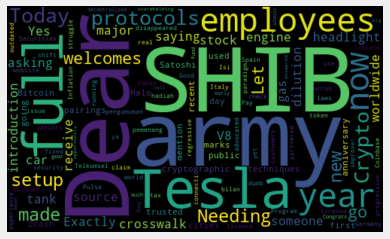

In [6]:
def get_analysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    

#create new column for analysis    
recent_twitter_df['Analysis'] = recent_twitter_df['Polarity'].apply(get_analysis)


recent_twitter_df.to_csv('Data/Functionality/Twitter/subjectivity_and_polarity.csv')

#plot Word Cloud
all_words = ' '.join( [twts for twts in recent_twitter_df['Tweets']] )
word_cloud = WordCloud(width = 500, height=300, random_state = 2, max_font_size = 119).generate(all_words)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# pytrends = TrendReq(hl= 'en-US')


# list_a = nlp_cryptos[0:5]
# list_b = nlp_cryptos[6:10]
# list_c = nlp_cryptos[11:15]
# list_d = nlp_cryptos[16:20]

# google_topics = []
# if len(list_a) > 0:
#     google_topics.append(list_a)

# if len(list_b) > 0:
#     google_topics.append(list_b)

# if len(list_c) > 0:
#     google_topics.append(list_c)

# if len(list_d) > 0:
#     google_topics.append(list_d)

# google_topics

In [ ]:
# # List of cryptocurriences (only 5 crypto curriences at a time) pytrends gives a 400 error if more then 5 cryptocurreinces are added. 
# total_df = pd.DataFrame()
# # Instantiate SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()


# for list in google_topics:
#         pytrends.build_payload(list, cat=0, timeframe='today 3-m', gprop='news')
#         crypto_trends = pytrends.interest_over_time()
#         crypto_trends=crypto_trends.drop(columns= 'isPartial')        
# #         total_df['Trending Crypto']=crypto_trends.apply(lambda row:'_'.join(row[row.values>20].index), axis= 1)
#         total_df = crypto_trends.join(total_df).dropna(how="any")
#         crypto_trends.tail(10)

# # Set current date and the date from one month ago using the ISO format
# current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
# past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()



# # Use newsapi client to get most relevant headlines per day in the past month
# def get_headlines(keyword):
#     all_headlines = []
#     all_dates = []    
#     date = datetime.strptime(current_date[:10], "%Y-%m-%d")
#     end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
#     print(f"Fetching news about '{keyword}'")
#     print("*" * 30)
#     while date > end_date:
#         print(f"retrieving news from: {date}")
#         articles = newsapi.get_everything(
#             q=keyword,
#             from_param=str(date)[:10],
#             to=str(date)[:10],
#             language="en",
#             sort_by="relevancy",
#             page=1,
#         )
#         headlines = []
#         for i in range(0, len(articles["articles"])):
#             headlines.append(articles["articles"][i]["title"])
#         all_headlines.append(headlines)
#         all_dates.append(date)
#         date = date - timedelta(days=1)
#     return all_headlines, all_dates


#     # Get first topic (kw = trending crypto)
# crypto_headlines, dates = get_headlines("crypto")

# # inflation headline
# inflation_headlines, _ = get_headlines("inflation")

# # Get third topic 
# energy__headlines, _ = get_headlines("energy")


In [ ]:
# # Create function that computes average compound sentiment of headlines for each day
# def headline_sentiment_summarizer_avg(headlines):
#     sentiment = []
#     for day in headlines:
#         day_score = []
#         for h in day:
#             if h == None:
#                 continue
#             else:
#                 day_score.append(sid.polarity_scores(h)["compound"])
#         sentiment.append(sum(day_score) / len(day_score))
#     return sentiment

In [ ]:
# # Get averages of each topics sentiment
# crypto_choice_avg = headline_sentiment_summarizer_avg(crypto_headlines)
# inflation_headlinese_avg = headline_sentiment_summarizer_avg(inflation_headlines)
# energy__headlines_avg = headline_sentiment_summarizer_avg(energy__headlines)

In [ ]:
# # Combine Sentiment Averages into DataFrame
# topic_sentiments = pd.DataFrame(
#     {
#         "crypto_choice_avg": crypto_choice_avg,
#         "inflation_headlinese_avg": inflation_headlinese_avg,
#         "crypto_gen_avg": energy__headlines_avg,
#     }
# )

# # Set the index value of the sentiment averages DataFrame to be the series of dates.
# topic_sentiments.index = pd.to_datetime(dates)


# # Merge with crypto df
# topic_sentiments_trends = total_df.join(topic_sentiments).dropna(how="any")
# # display(topic_sentiments)


# # Correlate the headlines' sentiment to returns
# correlation_df = topic_sentiments_trends.corr().style.background_gradient(cmap='PuBu')
# correlation_df.to_csv('Data/Functionality/Google/Correlation.csv')
# correlation_df